# Importando librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from datetime import datetime

import scipy.stats as st
from scipy.stats import t as t_student
from scipy.stats import norm

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats import anova
from statsmodels.stats.anova import anova_lm

from statsmodels.graphics.factorplots import interaction_plot
from  statsmodels.stats.multicomp import pairwise_tukeyhsd

# Cargando data set

In [2]:
df=pd.read_csv('dataset_SCL.csv')
df

C:\Users\Roberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [4]:
df.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

# 1. 
# ¿Cómo se distribuyen los datos?¿Qué te llama la atención o cuál es tu conclusión sobre esto?

### Respuestas
##### ¿Cómo se distribuyen los datos? 
* El numero de vuelos varia principalmente de acuerdo a la aerolinea que opera el viaje y el destino del viaje.

* Las aerolineas que resgistran la mayor cantidad de los vuelos son Grupo LATAM y Sky Airline. Y las aerolines de codigo LAN, LXP y SKU.

* Existe una gran cantidad de destinos que registran la mayor cantidad de vuelos. Entre ellos se puede mencionar: Buenos Aires, Antofagasta, Lima, Calama, Puerto Montt, Concepcion, Iquique, Sao Paulo, Temuco, Arica, La Serena, Punta Arenas.

* Existe una leve mayor cantidad de viajes Nacionales.

* Los ultimos dias del mes registran menor cantidad de vuelos

* Los meses con menor cantidad de vuelo son entre abril y junio.

* Si bien existe practicamente una distribucion uniforme en el numero de vuelos por dia de la semana, el dia sabado registra menor cantidad de vuelos.

##### ¿Qué te llama la atención o cuál es tu conclusión sobre esto?
* Me llama la atencion que del total de vuelos programados inicialmente para la aerolinea de codigo LAN, esta termina finalmente operando practicamente poco mas de la mitad. De igual forma, con otros codigos de aerolineas, sus numeros de vuelos inicialmente programados no son los mismos con los finalmente operados. 
* La aerolinea de codigo LXP, a la que inicialmente se le programan muy pocos vuelos, finalmente termina operando una gran cantidad de ellos, ocupando el puesto numero 3 del ranking.

* La mayoria de las variables del conjunto de datos son categoricas.

### Analisis

In [5]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [6]:
df.nunique()

Fecha-I      53252
Vlo-I          750
Ori-I            1
Des-I           64
Emp-I           30
Fecha-O      62774
Vlo-O          866
Ori-O            1
Des-O           63
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        62
dtype: int64

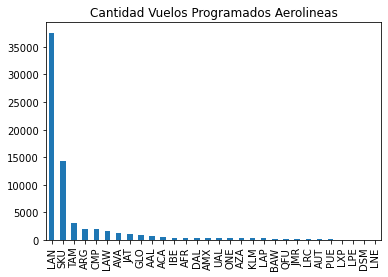

In [14]:
plot = df['Emp-I'].value_counts().plot(kind='bar',title='Cantidad Vuelos Programados Aerolineas')

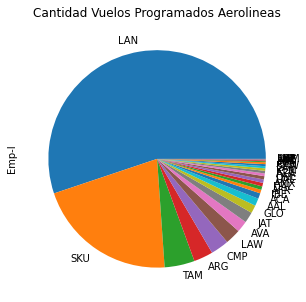

In [15]:
plt.figure(figsize=(7,5))
plot = df['Emp-I'].value_counts().plot.pie(title='Cantidad Vuelos Programados Aerolineas')

In [16]:
df['Emp-I'].describe()

count     68206
unique       30
top         LAN
freq      37611
Name: Emp-I, dtype: object

In [17]:
pd.value_counts(df['Emp-I'])

LAN    37611
SKU    14298
TAM     3049
ARG     1949
CMP     1850
LAW     1574
AVA     1152
JAT     1095
GLO      806
AAL      757
ACA      565
IBE      362
AFR      358
DAL      358
AMX      351
UAL      335
ONE      279
AZA      259
KLM      251
LAP      216
BAW      205
QFU      195
JMR      100
LRC       92
AUT       74
PUE       49
LXP        9
LPE        4
DSM        2
LNE        1
Name: Emp-I, dtype: int64

In [18]:
df['Emp-I'][df['Emp-I']=='LAN'].count()

37611

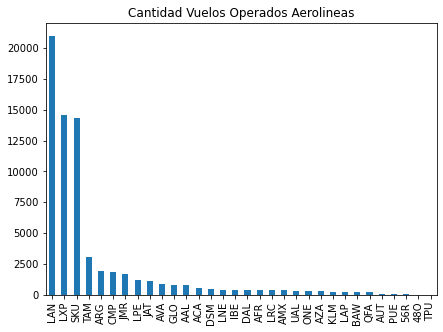

In [19]:
plt.figure(figsize=(7,5))
plot = df['Emp-O'].value_counts().plot(kind='bar',title='Cantidad Vuelos Operados Aerolineas')

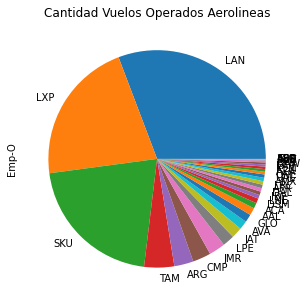

In [20]:
plt.figure(figsize=(7,5))
plot = df['Emp-O'].value_counts().plot.pie(title='Cantidad Vuelos Operados Aerolineas')

In [21]:
df['Emp-O'].describe()

count     68206
unique       32
top         LAN
freq      20988
Name: Emp-O, dtype: object

In [22]:
pd.value_counts(df['Emp-O'])

LAN    20988
LXP    14558
SKU    14298
TAM     3046
ARG     1946
CMP     1850
JMR     1647
LPE     1214
JAT     1095
AVA      885
GLO      806
AAL      757
ACA      565
DSM      493
LNE      374
IBE      362
DAL      358
AFR      358
LRC      357
AMX      351
UAL      335
ONE      279
AZA      259
KLM      251
LAP      219
BAW      205
QFA      195
AUT       77
PUE       49
56R       17
48O       10
TPU        2
Name: Emp-O, dtype: int64

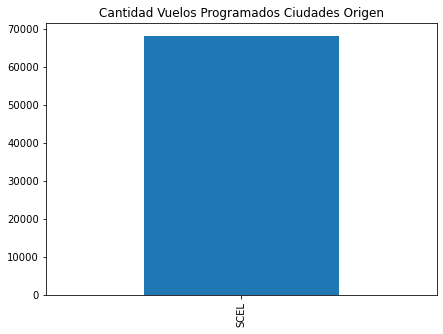

In [23]:
plt.figure(figsize=(7,5))
plot = df['Ori-I'].value_counts().plot(kind='bar',title='Cantidad Vuelos Programados Ciudades Origen')

In [24]:
df['Ori-I'].describe()

count     68206
unique        1
top        SCEL
freq      68206
Name: Ori-I, dtype: object

In [25]:
pd.value_counts(df['Ori-I'])

SCEL    68206
Name: Ori-I, dtype: int64

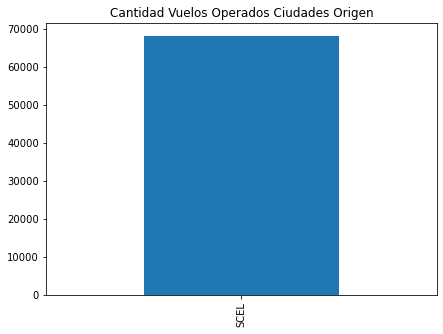

In [26]:
plt.figure(figsize=(7,5))
plot = df['Ori-O'].value_counts().plot(kind='bar',title='Cantidad Vuelos Operados Ciudades Origen')

In [27]:
df['Ori-O'].describe()

count     68206
unique        1
top        SCEL
freq      68206
Name: Ori-O, dtype: object

In [28]:
pd.value_counts(df['Ori-O'])

SCEL    68206
Name: Ori-O, dtype: int64

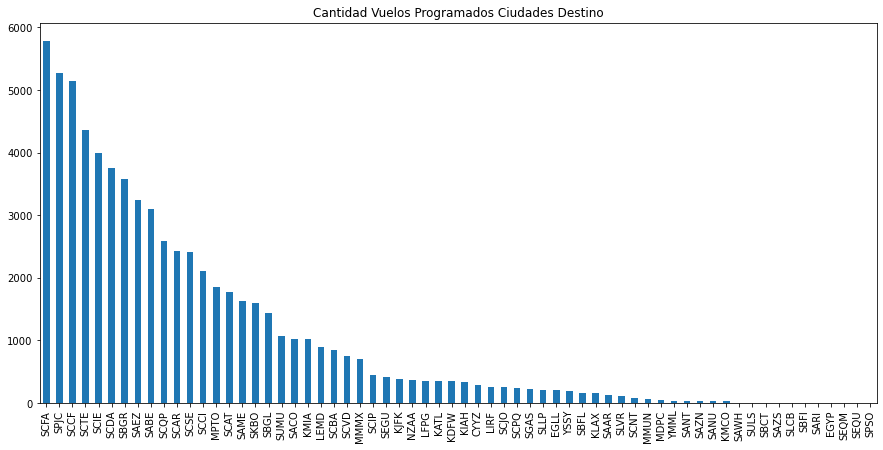

In [29]:
plt.figure(figsize=(15,7))
plot = df['Des-I'].value_counts().plot(kind='bar',title='Cantidad Vuelos Programados Ciudades Destino')

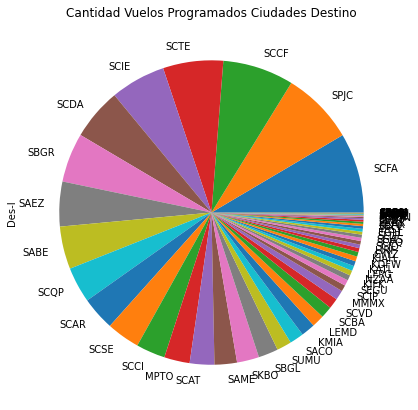

In [30]:
plt.figure(figsize=(15,7))
plot = df['Des-I'].value_counts().plot.pie(title='Cantidad Vuelos Programados Ciudades Destino')

In [31]:
df['Des-I'].describe()

count     68206
unique       64
top        SCFA
freq       5787
Name: Des-I, dtype: object

In [32]:
pd.value_counts(df['Des-I'])

SCFA    5787
SPJC    5270
SCCF    5145
SCTE    4357
SCIE    3995
        ... 
SARI       1
EGYP       1
SEQM       1
SEQU       1
SPSO       1
Name: Des-I, Length: 64, dtype: int64

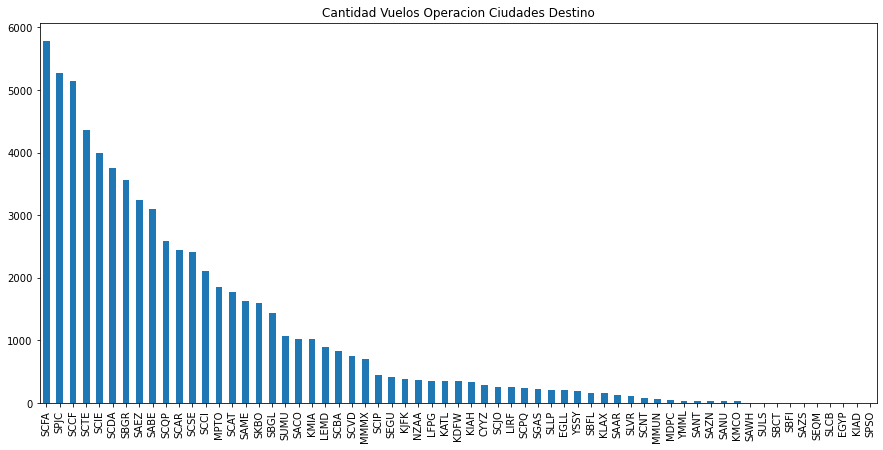

In [33]:
plt.figure(figsize=(15,7))
plot = df['Des-O'].value_counts().plot(kind='bar',title='Cantidad Vuelos Operacion Ciudades Destino')

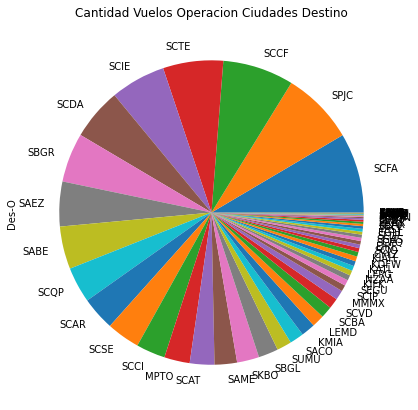

In [34]:
plt.figure(figsize=(15,7))
plot = df['Des-O'].value_counts().plot.pie(title='Cantidad Vuelos Operacion Ciudades Destino')

In [35]:
df['Des-O'].describe()

count     68206
unique       63
top        SCFA
freq       5786
Name: Des-O, dtype: object

In [36]:
pd.value_counts(df['Des-O'])

SCFA    5786
SPJC    5270
SCCF    5146
SCTE    4357
SCIE    3993
        ... 
SEQM       2
SLCB       1
EGYP       1
KIAD       1
SPSO       1
Name: Des-O, Length: 63, dtype: int64

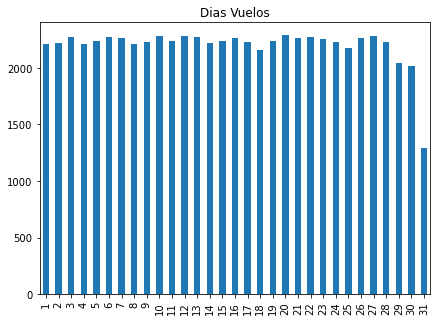

In [37]:
plt.figure(figsize=(7,5))
plot = df['DIA'].value_counts(sort=False).plot(kind='bar',title='Dias Vuelos')

In [38]:
df['DIA'].describe()

count    68206.000000
mean        15.714790
std          8.782886
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: DIA, dtype: float64

In [39]:
pd.value_counts(df['DIA'],sort=False)

1     2208
2     2223
3     2271
4     2215
5     2241
6     2275
7     2264
8     2213
9     2227
10    2283
11    2237
12    2284
13    2272
14    2221
15    2239
16    2268
17    2228
18    2160
19    2238
20    2290
21    2267
22    2272
23    2260
24    2232
25    2179
26    2267
27    2286
28    2232
29    2044
30    2020
31    1290
Name: DIA, dtype: int64

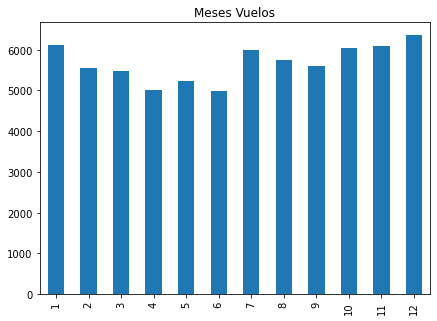

In [40]:
plt.figure(figsize=(7,5))
plot = df['MES'].value_counts(sort=False).plot(kind='bar',title='Meses Vuelos')

In [41]:
df['MES'].describe()

count    68206.000000
mean         6.622585
std          3.523321
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: MES, dtype: float64

In [42]:
pd.value_counts(df['MES'],sort=True)

12    6356
1     6108
11    6080
10    6032
7     5992
8     5744
9     5610
2     5561
3     5482
5     5240
4     5020
6     4981
Name: MES, dtype: int64

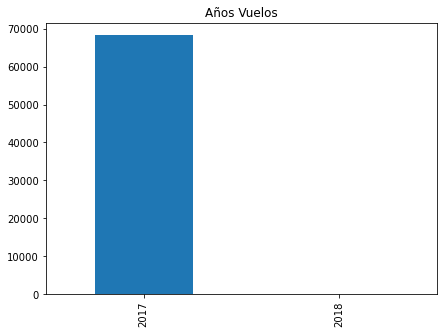

In [43]:
plt.figure(figsize=(7,5))
plot = df['AÑO'].value_counts().plot(kind='bar',title='Años Vuelos')

In [44]:
df['AÑO'].describe()

count    68206.000000
mean      2017.000029
std          0.005415
min       2017.000000
25%       2017.000000
50%       2017.000000
75%       2017.000000
max       2018.000000
Name: AÑO, dtype: float64

In [45]:
pd.value_counts(df['AÑO'])

2017    68204
2018        2
Name: AÑO, dtype: int64

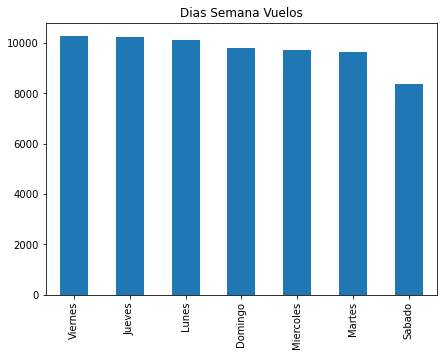

In [46]:
plt.figure(figsize=(7,5))
plot = df['DIANOM'].value_counts().plot(kind='bar',title='Dias Semana Vuelos')

In [47]:
df['DIANOM'].describe()

count       68206
unique          7
top       Viernes
freq        10292
Name: DIANOM, dtype: object

In [48]:
pd.value_counts(df['DIANOM'])

Viernes      10292
Jueves       10251
Lunes        10131
Domingo       9796
Miercoles     9722
Martes        9662
Sabado        8352
Name: DIANOM, dtype: int64

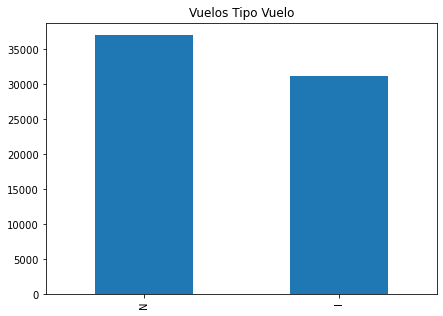

In [49]:
plt.figure(figsize=(7,5))
plot = df['TIPOVUELO'].value_counts().plot(kind='bar',title='Vuelos Tipo Vuelo')

In [50]:
df['TIPOVUELO'].describe()

count     68206
unique        2
top           N
freq      36966
Name: TIPOVUELO, dtype: object

In [51]:
pd.value_counts(df['TIPOVUELO'])

N    36966
I    31240
Name: TIPOVUELO, dtype: int64

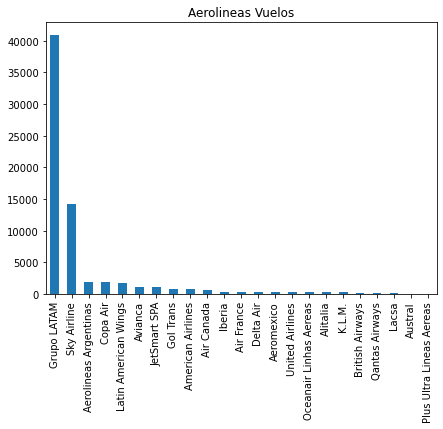

In [52]:
plt.figure(figsize=(7,5))
plot = df['OPERA'].value_counts().plot(kind='bar',title='Aerolineas Vuelos')

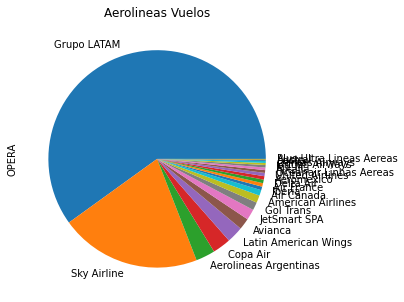

In [53]:
plt.figure(figsize=(7,5))
plot = df['OPERA'].value_counts().plot.pie(title='Aerolineas Vuelos')

In [54]:
df['OPERA'].describe()

count           68206
unique             23
top       Grupo LATAM
freq            40892
Name: OPERA, dtype: object

In [55]:
pd.value_counts(df['OPERA'])

Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Air France                    358
Delta Air                     358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64

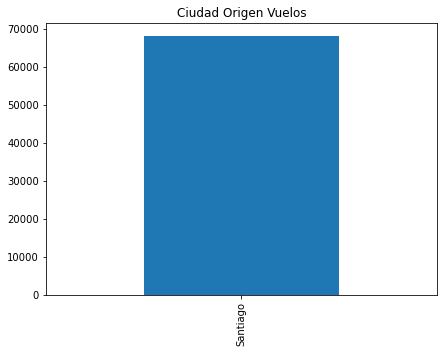

In [56]:
plt.figure(figsize=(7,5))
plot = df['SIGLAORI'].value_counts().plot(kind='bar',title='Ciudad Origen Vuelos')

In [57]:
df['SIGLAORI'].describe()

count        68206
unique           1
top       Santiago
freq         68206
Name: SIGLAORI, dtype: object

In [58]:
pd.value_counts(df['SIGLAORI'])

Santiago    68206
Name: SIGLAORI, dtype: int64

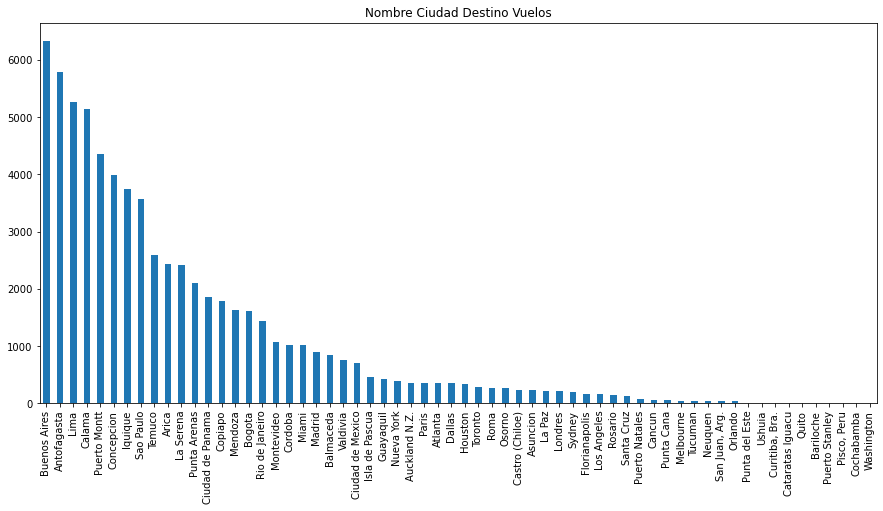

In [59]:
plt.figure(figsize=(15,7))
plot = df['SIGLADES'].value_counts().plot(kind='bar',title='Nombre Ciudad Destino Vuelos')

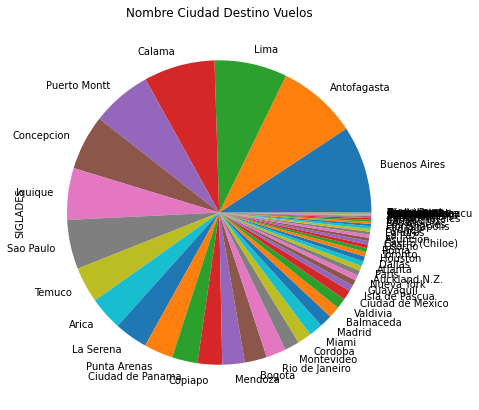

In [60]:
plt.figure(figsize=(15,7))
plot = df['SIGLADES'].value_counts().plot.pie(title='Nombre Ciudad Destino Vuelos')

In [61]:
df['SIGLADES'].describe()

count            68206
unique              62
top       Buenos Aires
freq              6335
Name: SIGLADES, dtype: object

In [62]:
pd.value_counts(df['SIGLADES'])

Buenos Aires      6335
Antofagasta       5786
Lima              5270
Calama            5146
Puerto Montt      4357
                  ... 
Bariloche            2
Puerto Stanley       1
Pisco, Peru          1
Cochabamba           1
Washington           1
Name: SIGLADES, Length: 62, dtype: int64

# 2. 
# Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv

In [63]:
df['Fecha-I']=pd.to_datetime(df['Fecha-I'])
df['Fecha-O']=pd.to_datetime(df['Fecha-O'])
df.dtypes

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object

In [71]:
condicionfecha=(df['Fecha-I']>='2017-12-15') | (df['Fecha-I']<='2017-03-03') | ((df['Fecha-I']>='2017-07-15') & (df['Fecha-I']<='2017-07-31')) | ((df['Fecha-I']>='2017-09-11') & (df['Fecha-I']<='2017-09-30'))
df['temporada_alta']=np.where(condicionfecha,1,0)
df['dif_min']=np.where(df['Fecha-O']>df['Fecha-I'],pd.to_timedelta(df['Fecha-O']-df['Fecha-I']).dt.seconds/60,0)
df['atraso_15']=np.where(df['dif_min']>15,1,0)
condicionmañana=(df['Fecha-I'].dt.hour>=5)&(df['Fecha-I'].dt.hour<12)
condiciontarde=(df['Fecha-I'].dt.hour>=12)&(df['Fecha-I'].dt.hour<19)
condicionnoche=(df['Fecha-I'].dt.hour>=19)|(df['Fecha-I'].dt.hour<5)
df['periodo_dia']=np.where(condicionmañana,'mañana',np.where(condiciontarde,'tarde','noche'))
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,0.0,0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,0,tarde


### Exportacion columnas a archivo synthetic_features.csv

In [73]:
df_exp=pd.DataFrame(df.loc[:,['temporada_alta','dif_min','atraso_15','periodo_dia']])
df_exp

,temporada_alta,dif_min,atraso_15,periodo_dia
0,1,3.0,0,noche
1,1,9.0,0,noche
2,1,9.0,0,noche
3,1,3.0,0,noche
4,1,0.0,0,noche
...,...,...,...,...
68201,1,46.0,1,tarde
68202,1,16.0,1,tarde
68203,1,40.0,1,tarde
68204,1,13.0,0,tarde


* Se asume que el archivo csv se creara en la misma carpeta (repositorio) en el que se encuentra este jupyternotebook. Por lo mismo el path no lleva toda la ruta expecifica del archivo.

In [74]:
df_exp.to_csv('synthetic_features.csv',index=False)

# 3. 
# ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?¿Qué variables esperarías que más influyeran en predecir atrasos?

### Respuestas
##### ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
*  En primera instancia la tasa de atrasaso se distirbuye poisson. Sin embargo, por cada variable su distirbucion varia. En promedio, el atraso de un vuelo es de 10 minutos. La mayor variacion (desviacion estandar) se debe al destino del vuelo, aerolinea, mes del año y tipo de vuelo. Los destinos con mas atraso del vuelo son Cochabamba, Puerto Stanley, Quito, Sydney, Ushuia. Las aerolines con mas atraso del vuelo son Qantas Airways, Plus Ultra Lineas Aereas, Latin American Wings, Air Canada, Aerolineas Argentinas. Los meses con mas atraso son julio, octubre y diciembre. Por ultimo, cabe destacar que existe una leve mayor atraso promedio del vuelo en los vuelos internacionales.

##### ¿Qué variables esperarías que más influyeran en predecir atrasos?
* Las variables destino del vuelo, aerolinea del vuelo, mes del año y tipo de vuelo.


### Distribucion tasa atraso

<AxesSubplot:xlabel='dif_min', ylabel='Count'>

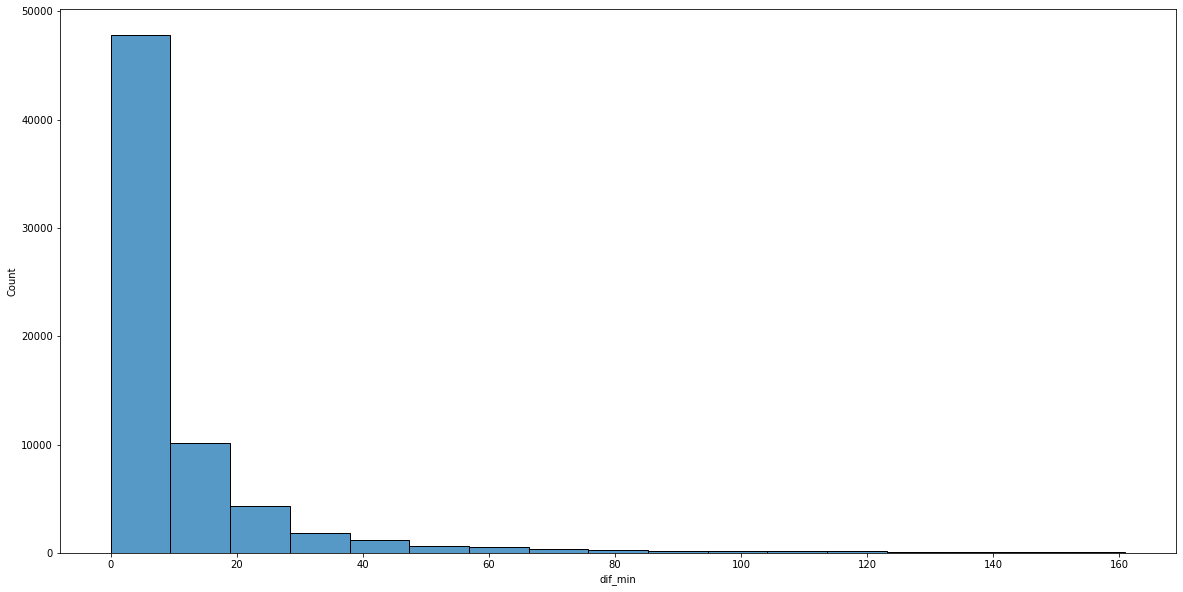

In [75]:
plt.figure(figsize=(20,10))
sns.histplot(df['dif_min'],bins=int(1+3.322*m.log10(len(df['dif_min']))))

In [76]:
print('Tasa atraso general:')
df['dif_min'].mean()

Tasa atraso general:


10.11576694132481

Es posible apreciar que la tasa de atraso se distribuye poisson con media 10.11

<AxesSubplot:>

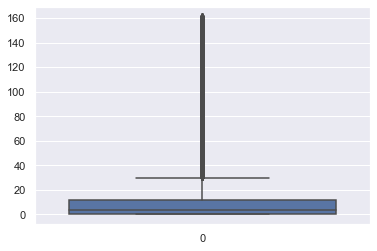

In [171]:
sns.boxplot(data=df['dif_min'])

In [177]:
print('Porcentaje de datos fuera de los bigotes del grafico de cajas: ', float(len(df[df['dif_min']>30])/len(df))*100)

Porcentaje de datos fuera de los bigotes del grafico de cajas:  7.93038735595109


### Analisis tasa atraso por  variable

In [408]:
bydestino=df.groupby('SIGLADES').mean()
bydestino['dif_min'].describe()

count     62.000000
mean      13.598913
std       15.609377
min        0.000000
25%        7.936995
50%       10.071815
75%       14.171817
max      113.000000
Name: dif_min, dtype: float64

[]

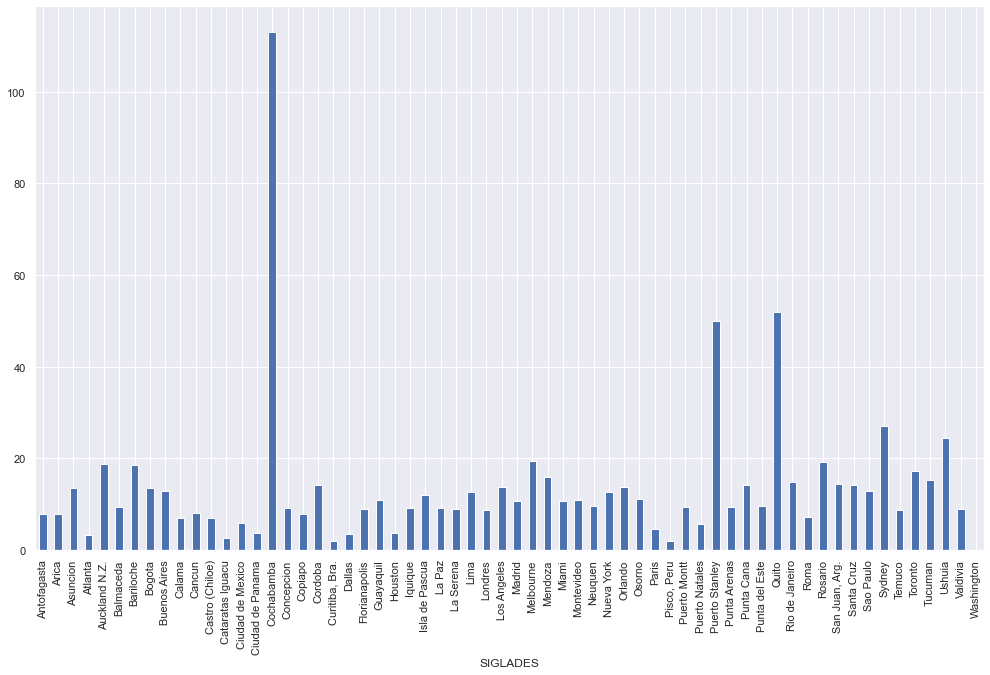

In [409]:
plt.figure(figsize=(17,10))
bydestino['dif_min'].plot(kind='bar')
plt.plot()

<AxesSubplot:ylabel='dif_min'>

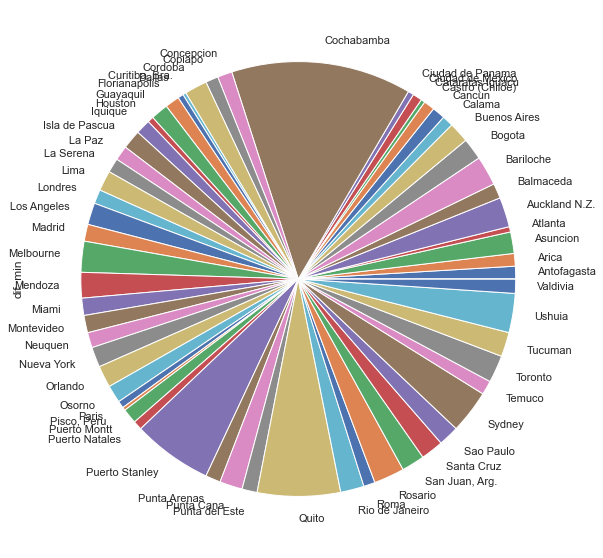

In [410]:
plt.figure(figsize=(17,10))
bydestino['dif_min'].plot.pie()

<AxesSubplot:xlabel='dif_min', ylabel='Count'>

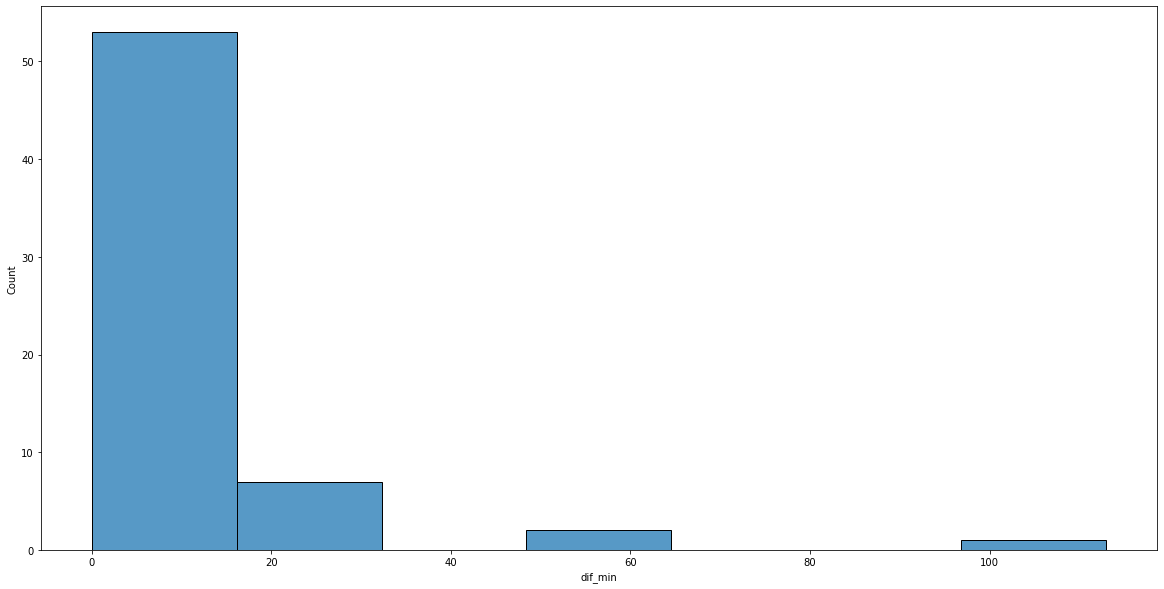

In [80]:
plt.figure(figsize=(20,10))
sns.histplot(bydestino['dif_min'],bins=round(1+3.322*m.log10(len(bydestino['dif_min']))))

In [81]:
pd.crosstab(index=df['Des-O'],columns=df['atraso_15'], margins=True)

atraso_15,0,1,All
Des-O,,,
CYYZ,194,89,283
EGLL,176,29,205
EGYP,0,1,1
KATL,337,21,358
KDFW,332,25,357
...,...,...,...
SULS,5,1,6
SUMU,846,220,1066
YMML,18,21,39


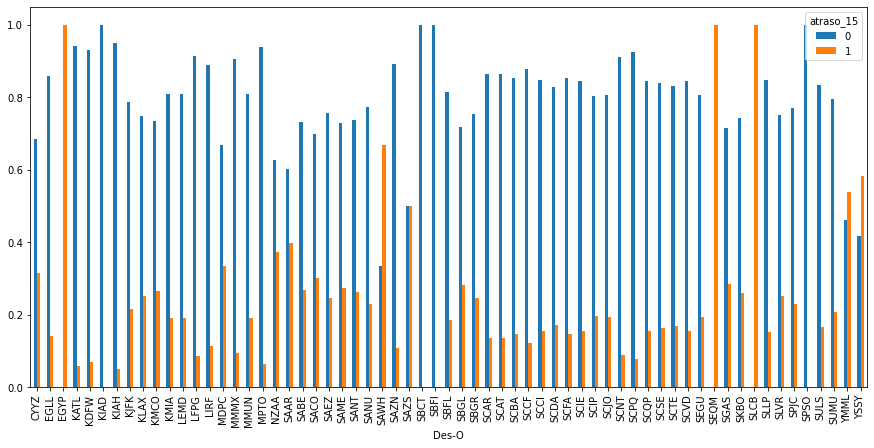

In [82]:
plot = pd.crosstab(index=df['Des-O'],columns=df['atraso_15']).apply(lambda r: r/r.sum(),axis=1).plot(kind='bar',figsize=(15,7))
#.apply(lambda r: r/r.sum() *100,axis=1)

In [83]:
byaerolinea=df.groupby('OPERA').mean()
byaerolinea['dif_min'].describe()

count    23.000000
mean     10.924337
std       8.399142
min       2.079772
25%       4.842669
50%       8.800000
75%      12.680598
max      32.306122
Name: dif_min, dtype: float64

<AxesSubplot:xlabel='OPERA'>

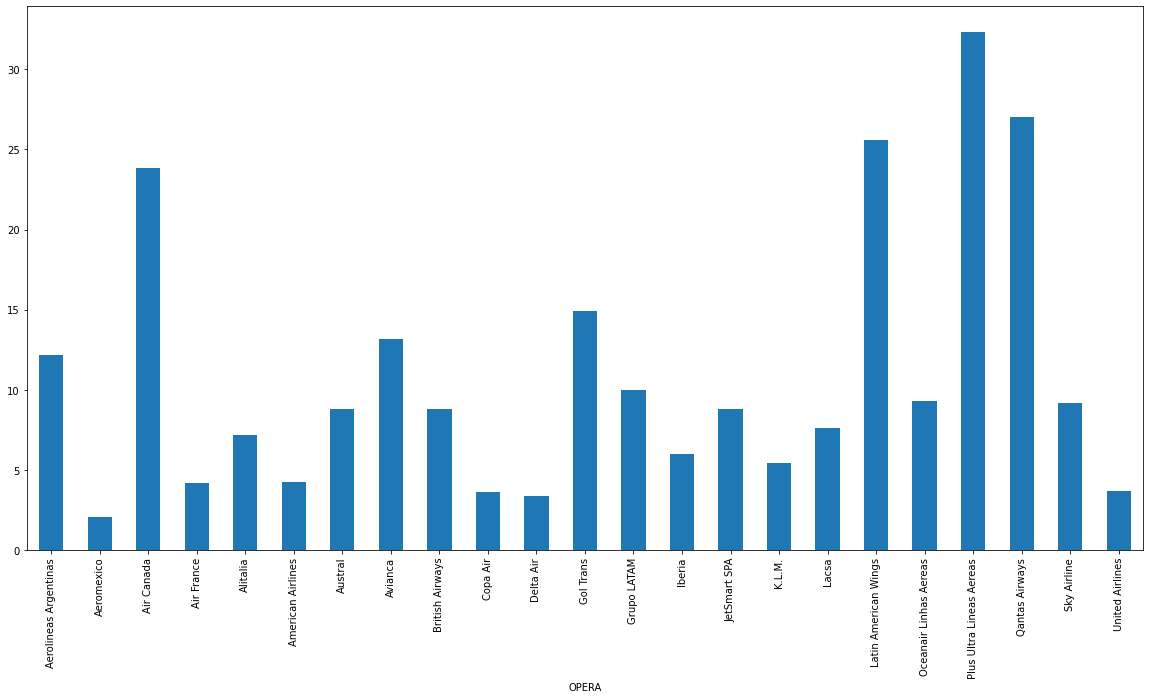

In [84]:
plt.figure(figsize=(20,10))
byaerolinea['dif_min'].plot(kind='bar')

<AxesSubplot:ylabel='dif_min'>

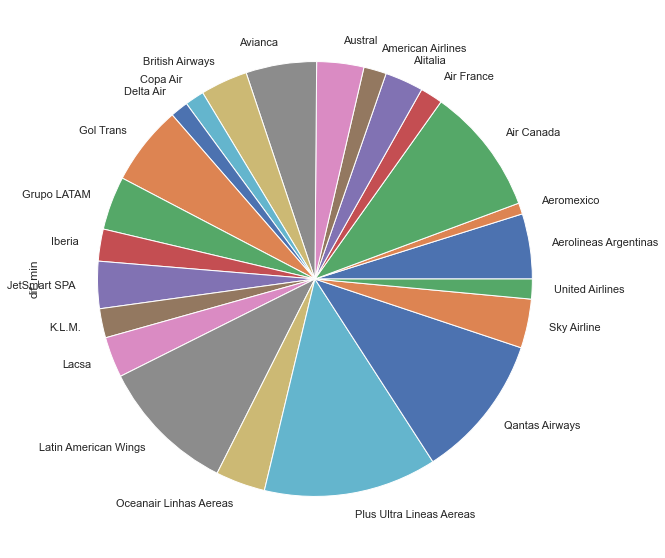

In [404]:
plt.figure(figsize=(17,10))
byaerolinea['dif_min'].plot.pie()

In [ ]:
Qantas Airways, Plus Ultra Lineas Aereas, Latin American Wings, Air Canada, Aerolineas Argentinas

<AxesSubplot:xlabel='dif_min', ylabel='Count'>

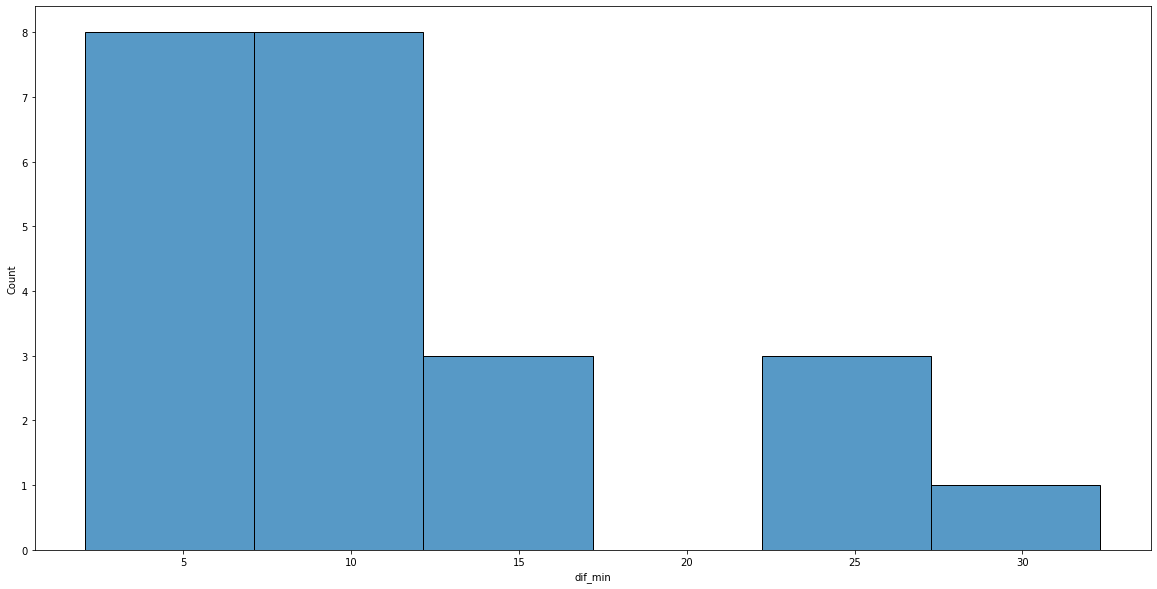

In [85]:
plt.figure(figsize=(20,10))
sns.histplot(byaerolinea['dif_min'],bins=round(1+3.322*m.log10(len(byaerolinea['dif_min']))))

In [86]:
pd.crosstab(index=df['OPERA'],columns=df['atraso_15'], margins=True)

atraso_15,0,1,All
OPERA,,,
Aerolineas Argentinas,1481,468,1949
Aeromexico,341,10,351
Air Canada,307,258,565
Air France,328,30,358
Alitalia,230,29,259
American Airlines,706,51,757
Austral,59,15,74
Avianca,846,306,1152
British Airways,176,29,205


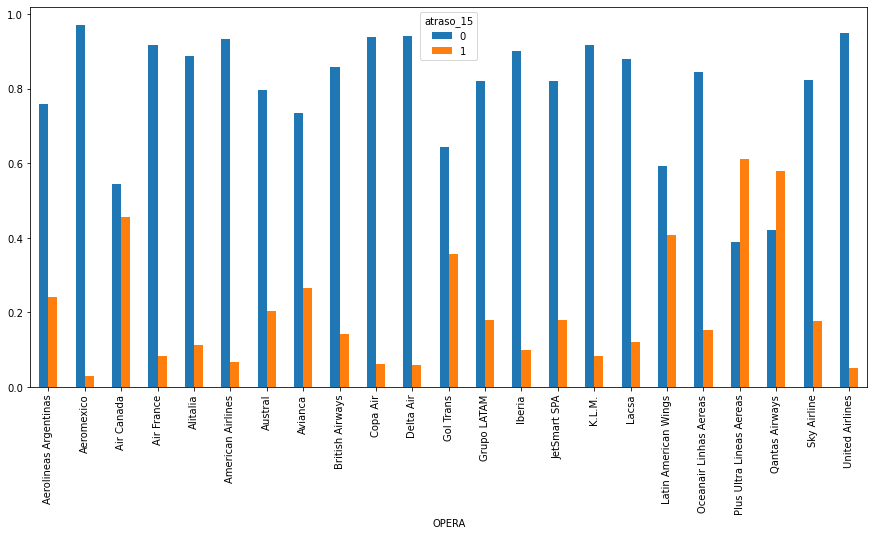

In [87]:
plot = pd.crosstab(index=df['OPERA'],columns=df['atraso_15']).apply(lambda r: r/r.sum(),axis=1).plot(kind='bar',figsize=(15,7))

In [88]:
bymes=df.groupby('MES').mean()
bymes['dif_min'].describe()

count    12.000000
mean     10.002990
std       2.567078
min       6.919920
25%       8.610508
50%       9.614579
75%      10.773483
max      16.045895
Name: dif_min, dtype: float64

<AxesSubplot:xlabel='MES'>

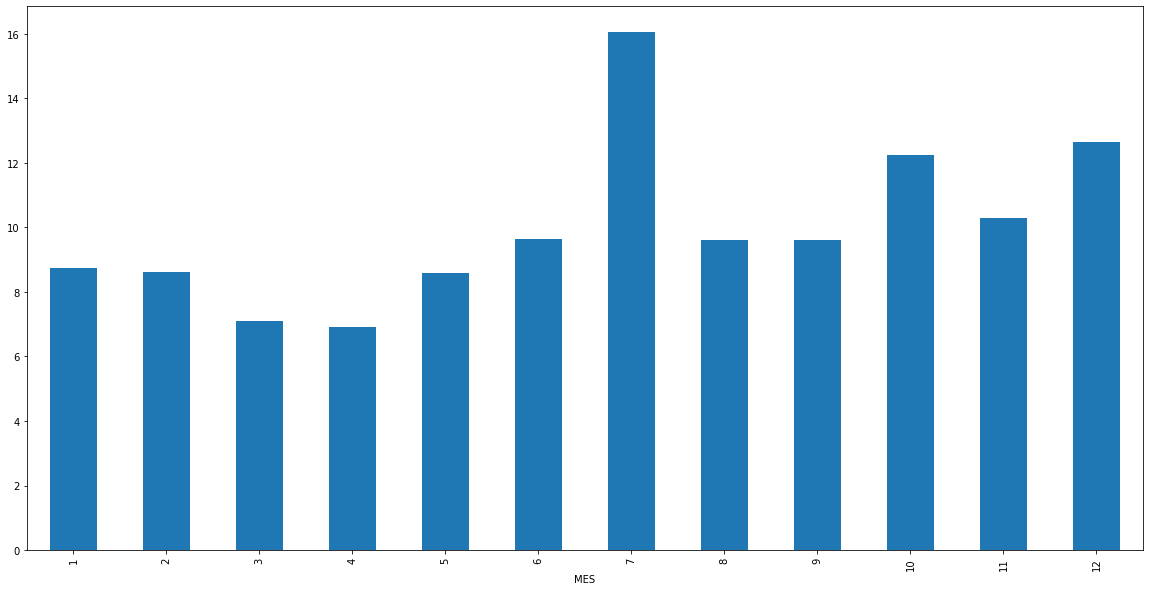

In [89]:
plt.figure(figsize=(20,10))
bymes['dif_min'].plot(kind='bar')

<AxesSubplot:xlabel='dif_min', ylabel='Count'>

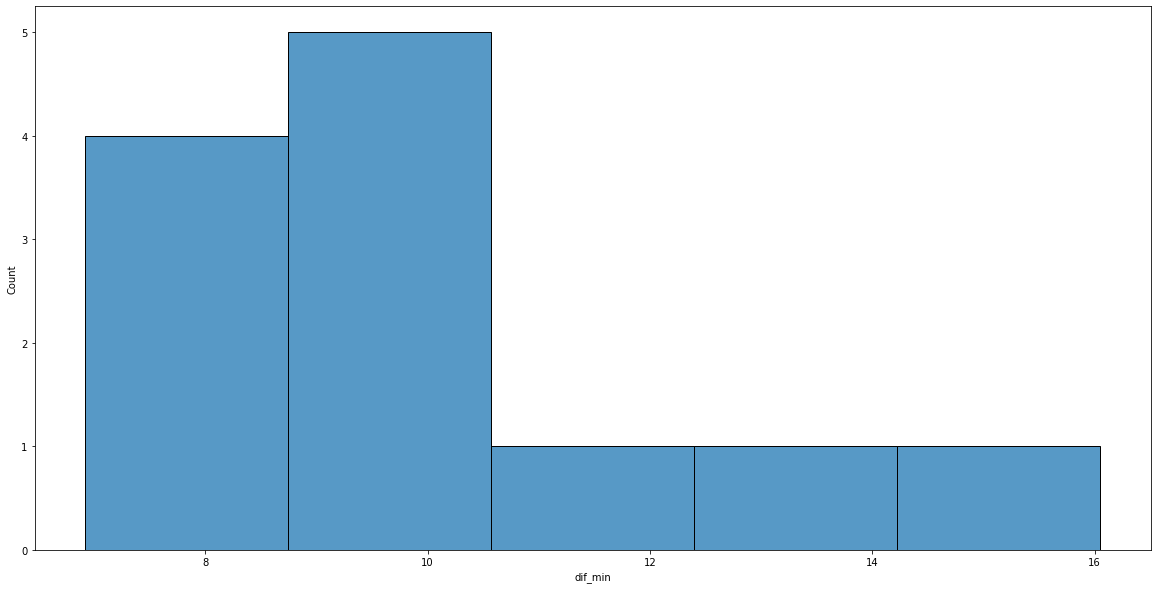

In [90]:
plt.figure(figsize=(20,10))
sns.histplot(bymes['dif_min'],bins=round(1+3.322*m.log10(len(bymes['dif_min']))))

In [91]:
pd.crosstab(index=df['MES'],columns=df['atraso_15'], margins=True)

atraso_15,0,1,All
MES,,,
1,5130,978,6108
2,4718,843,5561
3,4851,631,5482
4,4435,585,5020
5,4413,827,5240
6,4129,852,4981
7,4234,1758,5992
8,4748,996,5744
9,4643,967,5610


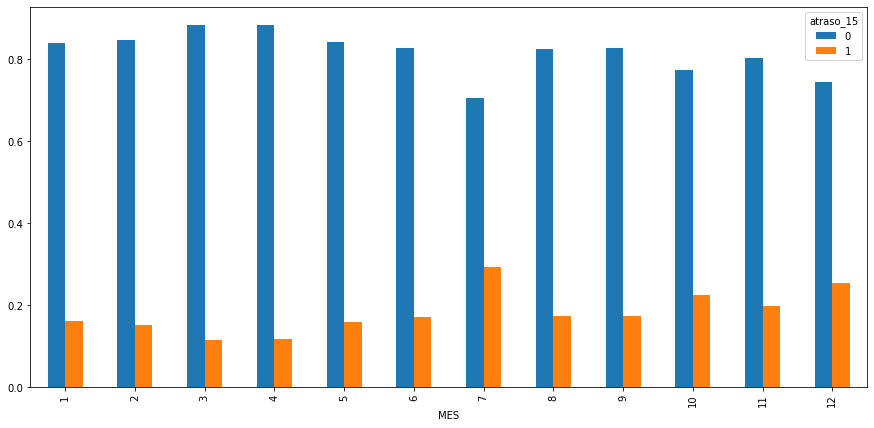

In [92]:
plot = pd.crosstab(index=df['MES'],columns=df['atraso_15']).apply(lambda r: r/r.sum(),axis=1).plot(kind='bar',figsize=(15,7))

In [93]:
bydia=df.groupby('DIANOM').mean()
bydia['dif_min'].describe()

count     7.000000
mean     10.082629
std       0.980736
min       9.017762
25%       9.441898
50%       9.553281
75%      10.716269
max      11.691022
Name: dif_min, dtype: float64

<AxesSubplot:xlabel='DIANOM'>

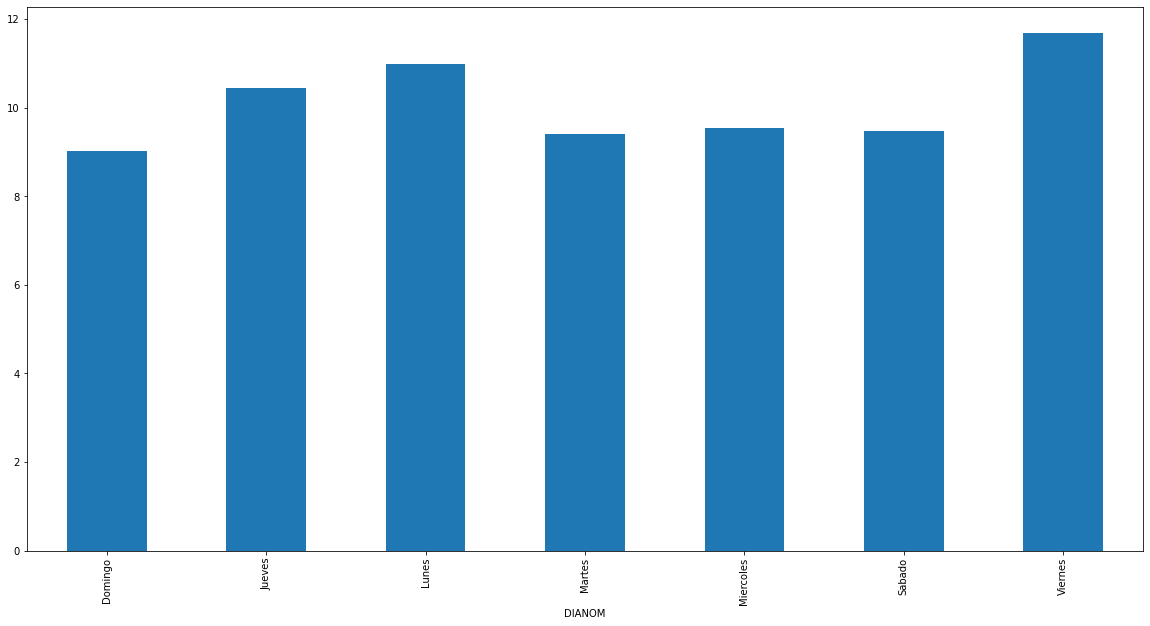

In [94]:
plt.figure(figsize=(20,10))
bydia['dif_min'].plot(kind='bar')

<AxesSubplot:xlabel='dif_min', ylabel='Count'>

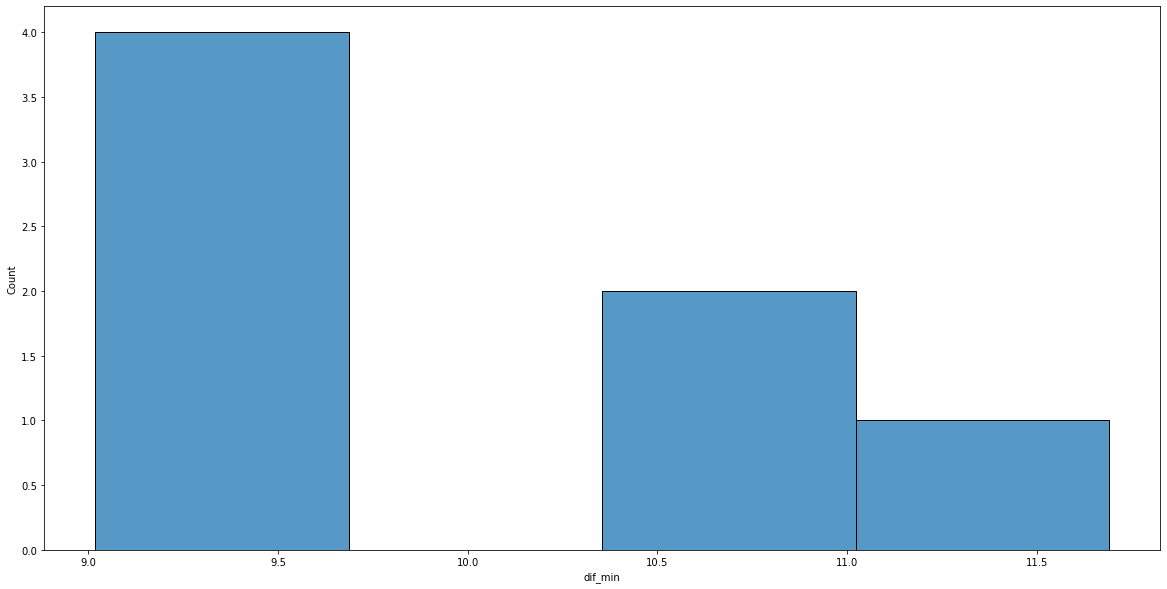

In [95]:
plt.figure(figsize=(20,10))
sns.histplot(bydia['dif_min'],bins=round(1+3.322*m.log10(len(bydia['dif_min']))))

In [96]:
pd.crosstab(index=df['DIANOM'],columns=df['atraso_15'], margins=True)

atraso_15,0,1,All
DIANOM,,,
Domingo,8218,1578,9796
Jueves,8206,2045,10251
Lunes,8083,2048,10131
Martes,8028,1634,9662
Miercoles,8061,1661,9722
Sabado,6989,1363,8352
Viernes,8007,2285,10292
All,55592,12614,68206


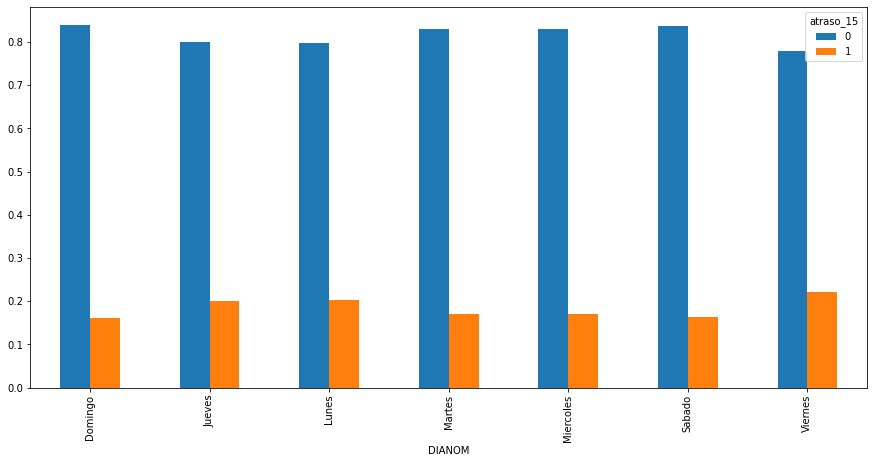

In [97]:
plot = pd.crosstab(index=df['DIANOM'],columns=df['atraso_15']).apply(lambda r: r/r.sum(),axis=1).plot(kind='bar',figsize=(15,7))

In [98]:
bytemporada=df.groupby('temporada_alta').mean()
bytemporada['dif_min'].describe()

count     2.000000
mean     10.248827
std       0.539637
min       9.867246
25%      10.058037
50%      10.248827
75%      10.439618
max      10.630408
Name: dif_min, dtype: float64

<AxesSubplot:xlabel='temporada_alta'>

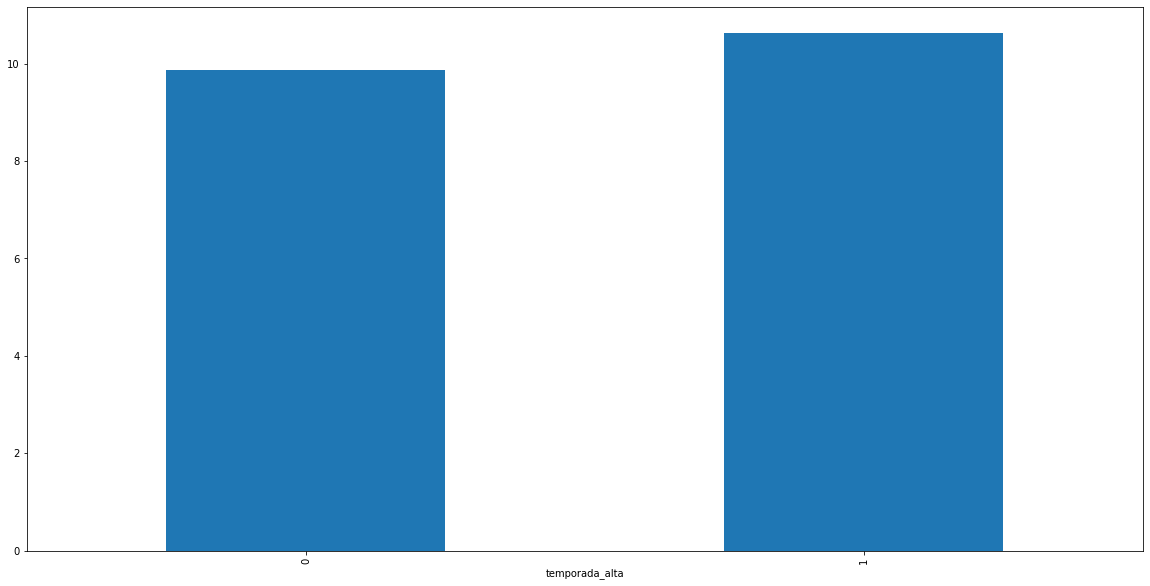

In [99]:
plt.figure(figsize=(20,10))
bytemporada['dif_min'].plot(kind='bar')

<AxesSubplot:xlabel='dif_min', ylabel='Count'>

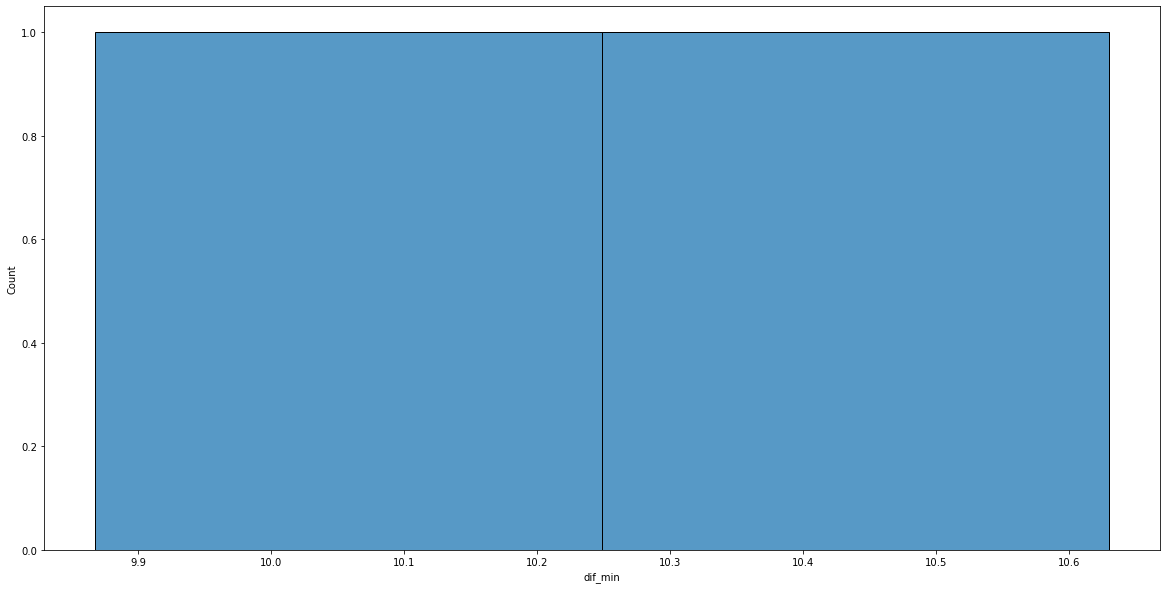

In [100]:
plt.figure(figsize=(20,10))
sns.histplot(bytemporada['dif_min'],bins=round(1+3.322*m.log10(len(bytemporada['dif_min']))))

In [101]:
pd.crosstab(index=df['temporada_alta'],columns=df['atraso_15'], margins=True)

atraso_15,0,1,All
temporada_alta,,,
0,37741,8254,45995
1,17851,4360,22211
All,55592,12614,68206


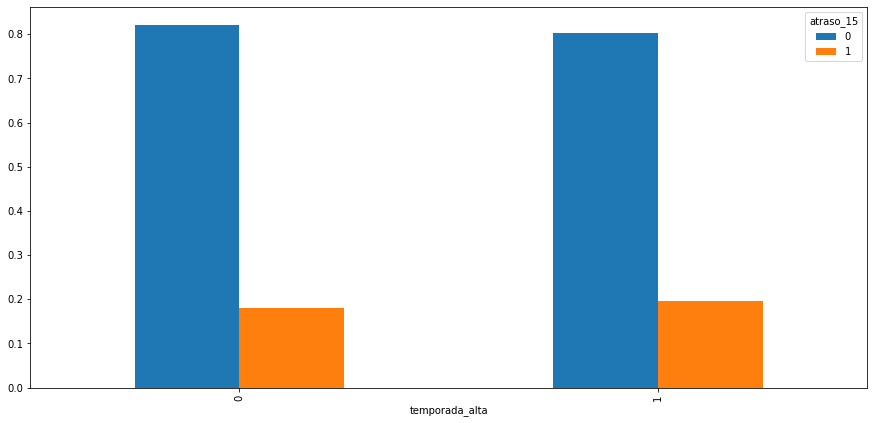

In [102]:
plot = pd.crosstab(index=df['temporada_alta'],columns=df['atraso_15']).apply(lambda r: r/r.sum(),axis=1).plot(kind='bar',figsize=(15,7))

In [103]:
bytipovuelo=df.groupby('TIPOVUELO').mean()
bytipovuelo['dif_min'].describe()

count     2.000000
mean     10.257267
std       2.383655
min       8.571769
25%       9.414518
50%      10.257267
75%      11.100016
max      11.942766
Name: dif_min, dtype: float64

<AxesSubplot:xlabel='TIPOVUELO'>

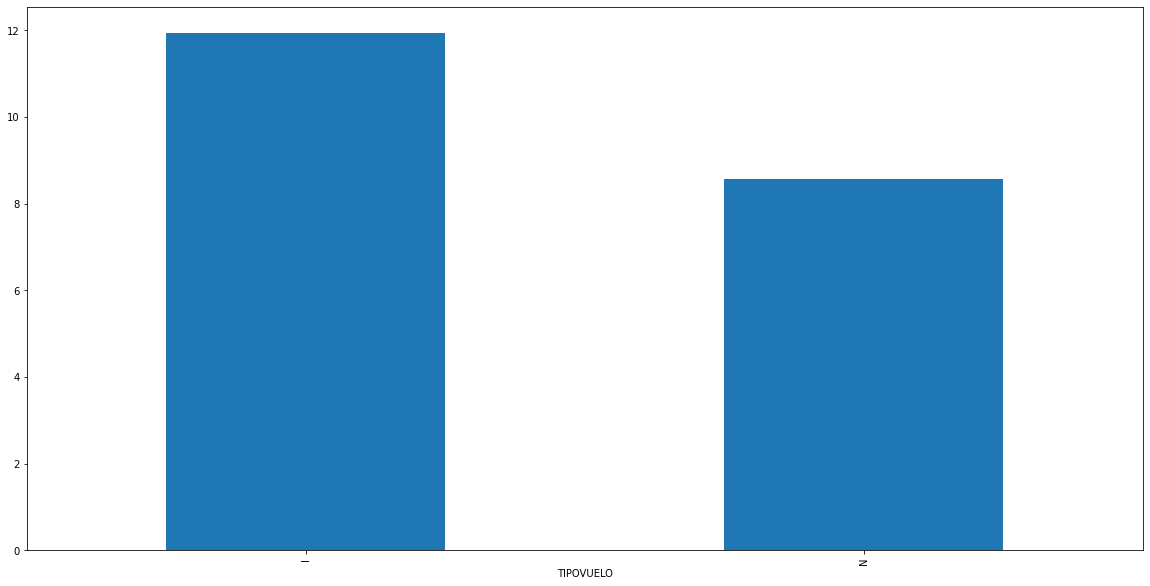

In [104]:
plt.figure(figsize=(20,10))
bytipovuelo['dif_min'].plot(kind='bar')

<AxesSubplot:xlabel='dif_min', ylabel='Count'>

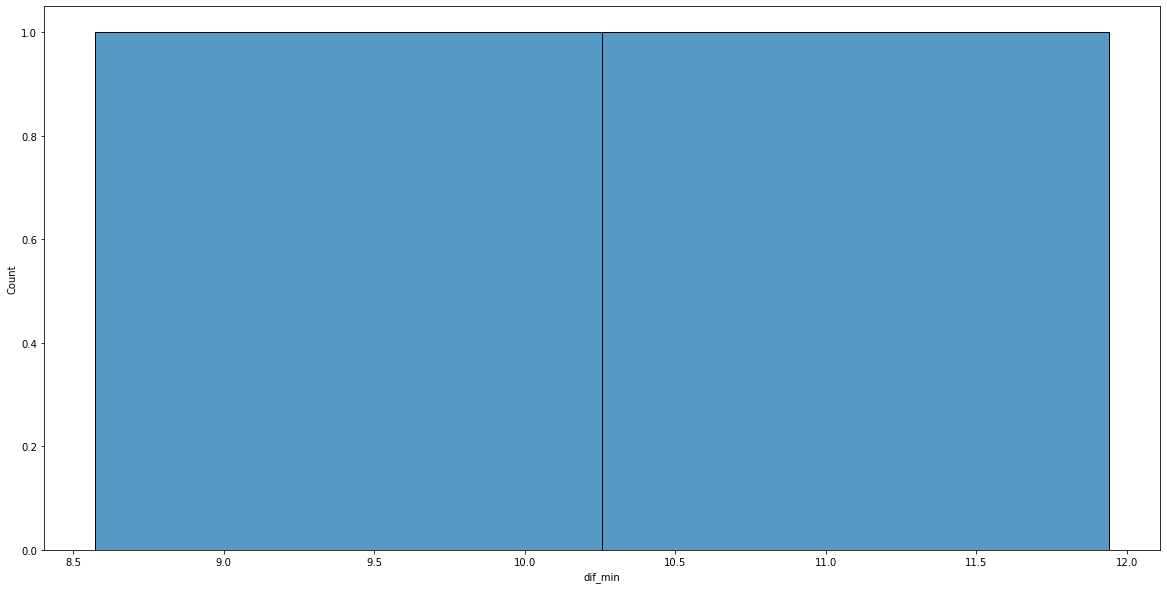

In [105]:
plt.figure(figsize=(20,10))
sns.histplot(bytipovuelo['dif_min'],bins=round(1+3.322*m.log10(len(bytipovuelo['dif_min']))))

In [106]:
pd.crosstab(index=df['TIPOVUELO'],columns=df['atraso_15'], margins=True)

atraso_15,0,1,All
TIPOVUELO,,,
I,24192,7048,31240
N,31400,5566,36966
All,55592,12614,68206


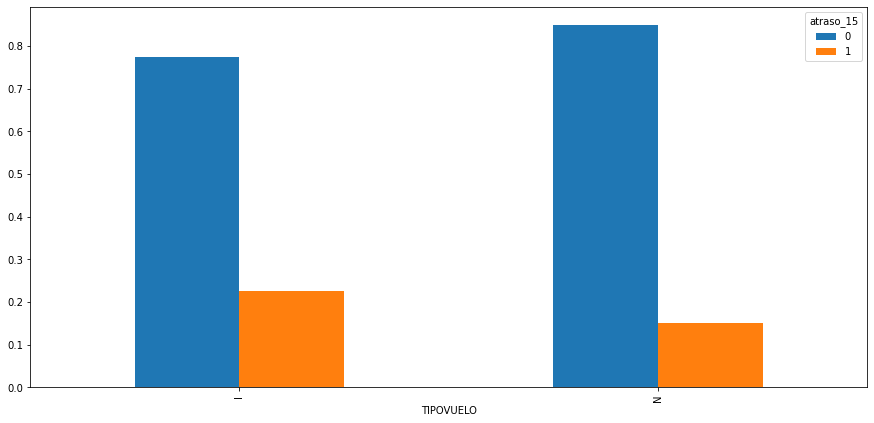

In [107]:
plot = pd.crosstab(index=df['TIPOVUELO'],columns=df['atraso_15']).apply(lambda r: r/r.sum(),axis=1).plot(kind='bar',figsize=(15,7))

### Analisis de Experimentos (ANOVA)

In [357]:
import copy
#df_ee=copy.copy(df[df['dif_min']<=30])
df_ee=copy.copy(df)

In [358]:
df_ee.rename(columns={'Des-I':'DesI'},inplace=True)
df_ee.rename(columns={'Emp-I':'EmpI'},inplace=True)
df_ee.rename(columns={'Des-O':'DesO'},inplace=True)
df_ee.rename(columns={'Emp-O':'EmpO'},inplace=True)

df_ee.drop(columns=['Fecha-I','Fecha-O','Vlo-I','Vlo-O','Ori-I','Ori-O','SIGLAORI','SIGLADES'],inplace=True)

In [359]:
df_ee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DesI            68206 non-null  object 
 1   EmpI            68206 non-null  object 
 2   DesO            68206 non-null  object 
 3   EmpO            68206 non-null  object 
 4   DIA             68206 non-null  int64  
 5   MES             68206 non-null  int64  
 6   AÑO             68206 non-null  int64  
 7   DIANOM          68206 non-null  object 
 8   TIPOVUELO       68206 non-null  object 
 9   OPERA           68206 non-null  object 
 10  temporada_alta  68206 non-null  int32  
 11  dif_min         68206 non-null  float64
 12  atraso_15       68206 non-null  int32  
 13  periodo_dia     68206 non-null  object 
dtypes: float64(1), int32(2), int64(3), object(8)
memory usage: 6.8+ MB


In [360]:
df_ee

,DesI,EmpI,DesO,EmpO,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,temporada_alta,dif_min,atraso_15,periodo_dia
0,KMIA,AAL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,1,3.0,0,noche
1,KMIA,AAL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,1,9.0,0,noche
2,KMIA,AAL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,1,9.0,0,noche
3,KMIA,AAL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,1,3.0,0,noche
4,KMIA,AAL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,1,0.0,0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,SPJC,JAT,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,1,46.0,1,tarde
68202,SPJC,JAT,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,1,16.0,1,tarde
68203,SPJC,JAT,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,1,40.0,1,tarde
68204,SPJC,JAT,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,1,13.0,0,tarde


In [361]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df_ee['DesI']=encoder.fit_transform(df_ee.DesO.values)
df_ee['EmpI']=encoder.fit_transform(df_ee.EmpO.values)
df_ee['DesO']=encoder.fit_transform(df_ee.DesO.values)
df_ee['EmpO']=encoder.fit_transform(df_ee.EmpO.values)
df_ee['DIANOM']=encoder.fit_transform(df_ee.DIANOM.values)
df_ee['TIPOVUELO']=encoder.fit_transform(df_ee.TIPOVUELO.values)
df_ee['OPERA']=encoder.fit_transform(df_ee.OPERA.values)
df_ee['periodo_dia']=encoder.fit_transform(df_ee.periodo_dia.values)

columnas=[i for i in df_ee.columns]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled=scaler.fit_transform(df_ee)
df_e=pd.DataFrame(scaled,columns=columnas)
correlaciones=df_e.corr()
correlaciones

,DesI,EmpI,DesO,EmpO,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,temporada_alta,dif_min,atraso_15,periodo_dia
DesI,1.000000,0.411981,1.000000,0.411981,0.000500,-0.007298,-0.009996,0.000955,0.363522,0.320726,0.009693,0.010186,0.003847,-0.017345
EmpI,0.411981,1.000000,0.411981,1.000000,0.001036,-0.013458,-0.001722,-0.003393,0.437365,0.795611,0.013863,-0.019161,-0.019992,0.023848
DesO,1.000000,0.411981,1.000000,0.411981,0.000500,-0.007298,-0.009996,0.000955,0.363522,0.320726,0.009693,0.010186,0.003847,-0.017345
EmpO,0.411981,1.000000,0.411981,1.000000,0.001036,-0.013458,-0.001722,-0.003393,0.437365,0.795611,0.013863,-0.019161,-0.019992,0.023848
DIA,0.000500,0.001036,0.000500,0.001036,1.000000,0.014318,-0.009073,-0.007998,0.001277,0.005472,0.183613,-0.005400,-0.002517,0.002233
MES,-0.007298,-0.013458,-0.007298,-0.013458,0.014318,1.000000,-0.008642,0.009252,0.011564,0.021092,-0.293902,0.075682,0.083416,0.007634
AÑO,-0.009996,-0.001722,-0.009996,-0.001722,-0.009073,-0.008642,1.000000,-0.002590,-0.005891,-0.001448,0.007793,0.002726,0.004394,-0.000014
DIANOM,0.000955,-0.003393,0.000955,-0.003393,-0.007998,0.009252,-0.002590,1.000000,-0.017403,0.000463,0.004167,0.019297,0.016417,-0.008489
TIPOVUELO,0.363522,0.437365,0.363522,0.437365,0.001277,0.011564,-0.005891,-0.017403,1.000000,0.357638,0.001707,-0.090084,-0.096295,-0.001515
OPERA,0.320726,0.795611,0.320726,0.795611,0.005472,0.021092,-0.001448,0.000463,0.357638,1.000000,0.005087,-0.001365,0.000823,0.009274


In [362]:
df_e

,DesI,EmpI,DesO,EmpO,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,temporada_alta,dif_min,atraso_15,periodo_dia
0,0.161290,0.064516,0.161290,0.064516,0.000000,0.0,0.0,0.000000,0.0,0.227273,1.0,0.018634,0.0,0.5
1,0.161290,0.064516,0.161290,0.064516,0.033333,0.0,0.0,0.333333,0.0,0.227273,1.0,0.055901,0.0,0.5
2,0.161290,0.064516,0.161290,0.064516,0.066667,0.0,0.0,0.500000,0.0,0.227273,1.0,0.055901,0.0,0.5
3,0.161290,0.064516,0.161290,0.064516,0.100000,0.0,0.0,0.666667,0.0,0.227273,1.0,0.018634,0.0,0.5
4,0.161290,0.064516,0.161290,0.064516,0.133333,0.0,0.0,0.166667,0.0,0.227273,1.0,0.000000,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,0.919355,0.516129,0.919355,0.516129,0.700000,1.0,0.0,1.000000,0.0,0.636364,1.0,0.285714,1.0,1.0
68202,0.919355,0.516129,0.919355,0.516129,0.800000,1.0,0.0,0.333333,0.0,0.636364,1.0,0.099379,1.0,1.0
68203,0.919355,0.516129,0.919355,0.516129,0.866667,1.0,0.0,0.666667,0.0,0.636364,1.0,0.248447,1.0,1.0
68204,0.919355,0.516129,0.919355,0.516129,0.933333,1.0,0.0,1.000000,0.0,0.636364,1.0,0.080745,0.0,1.0


<AxesSubplot:>

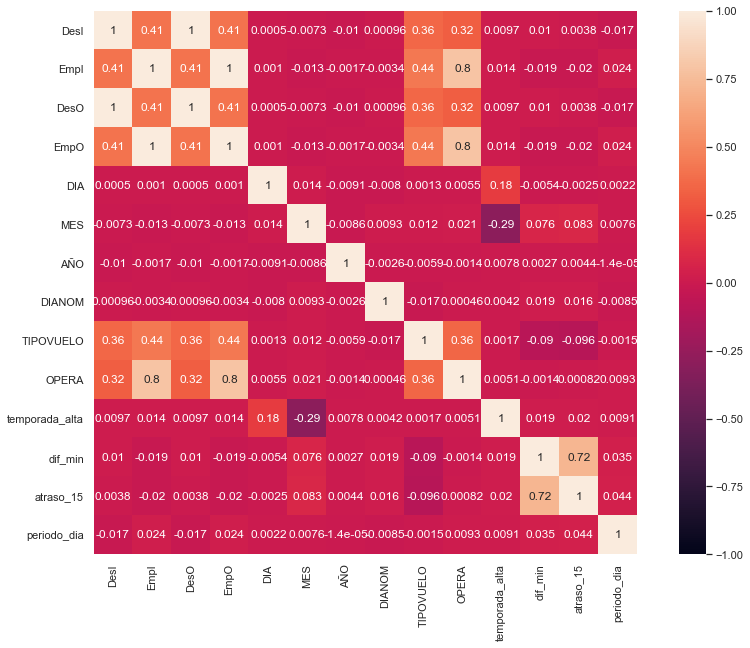

In [363]:
plt.figure(figsize=(15,10))
sns.heatmap(correlaciones,vmin=-1,vmax=1,xticklabels=correlaciones.columns,yticklabels=correlaciones.columns,annot=True,square=True)

* A partir dell grafico anterior es posible identificar que no existen correlaciones significativas entre las variables del data set. Esto lleva a descartar intentar entrenar modelos de regresion, y por lo tanto, los modelos de clasificacion podrian ser una buena alternativa para determinar si un vuelo se atrasara o no.

# 4.
# Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [373]:
df_e

,DesI,EmpI,DesO,EmpO,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,temporada_alta,dif_min,atraso_15,periodo_dia
0,0.161290,0.064516,0.161290,0.064516,0.000000,0.0,0.0,0.000000,0.0,0.227273,1.0,0.018634,0.0,0.5
1,0.161290,0.064516,0.161290,0.064516,0.033333,0.0,0.0,0.333333,0.0,0.227273,1.0,0.055901,0.0,0.5
2,0.161290,0.064516,0.161290,0.064516,0.066667,0.0,0.0,0.500000,0.0,0.227273,1.0,0.055901,0.0,0.5
3,0.161290,0.064516,0.161290,0.064516,0.100000,0.0,0.0,0.666667,0.0,0.227273,1.0,0.018634,0.0,0.5
4,0.161290,0.064516,0.161290,0.064516,0.133333,0.0,0.0,0.166667,0.0,0.227273,1.0,0.000000,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,0.919355,0.516129,0.919355,0.516129,0.700000,1.0,0.0,1.000000,0.0,0.636364,1.0,0.285714,1.0,1.0
68202,0.919355,0.516129,0.919355,0.516129,0.800000,1.0,0.0,0.333333,0.0,0.636364,1.0,0.099379,1.0,1.0
68203,0.919355,0.516129,0.919355,0.516129,0.866667,1.0,0.0,0.666667,0.0,0.636364,1.0,0.248447,1.0,1.0
68204,0.919355,0.516129,0.919355,0.516129,0.933333,1.0,0.0,1.000000,0.0,0.636364,1.0,0.080745,0.0,1.0


In [374]:
print('Numero de datos atraso (>15 min): ',len(df_e[df_e['atraso_15']==1]))
print('Numero de datos no atraso (<15 min): ',len(df_e[df_e['atraso_15']==0]))

Numero de datos atraso (>15 min):  12614
Numero de datos no atraso (<15 min):  55592


* Existe un mayor numero de vuelos con atraso (> 15 minutos) que sin atraso. Existira un desbalance de la muestra para entrenar el modelo

# Modelos de Clasificacion

In [379]:
X=df_e[['DesO','EmpO','OPERA','TIPOVUELO','temporada_alta','DIANOM','MES','periodo_dia']]
#X=df_e[['DesO','EmpO','temporada_alta','periodo_dia']]
y=df_e['atraso_15']

from sklearn import decomposition
pca=decomposition.PCA(n_components=3)
#X=pca.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_train

array([[ 4.87085945e-02, -3.16205072e-01, -2.68384820e-01, ...,
        -4.77355315e-01, -4.62094247e-01, -1.15931985e+00],
       [-1.14040937e+00, -3.16205072e-01, -2.68384820e-01, ...,
        -9.76028316e-01, -1.02837319e+00,  1.15548963e+00],
       [-1.95792797e+00, -3.16205072e-01, -2.68384820e-01, ...,
         2.13176859e-02, -1.02837319e+00, -1.91510922e-03],
       ...,
       [-8.43129878e-01, -1.24544490e+00, -2.68384820e-01, ...,
         1.51733669e+00,  1.51988206e+00, -1.15931985e+00],
       [-1.74251024e-01,  4.58161455e-01, -2.68384820e-01, ...,
         1.01866369e+00,  1.51988206e+00, -1.91510922e-03],
       [-1.14040937e+00, -3.16205072e-01, -2.68384820e-01, ...,
         2.13176859e-02, -1.31151267e+00, -1.15931985e+00]])

### Regresion Logistica

In [380]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(X_train,y_train)
logr_predicciones=logr.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,logr_predicciones))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90     16660
         1.0       0.00      0.00      0.00      3802

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462



C:\Users\Roberto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Roberto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Roberto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


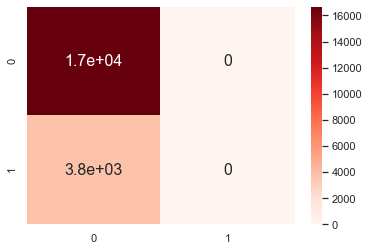

In [381]:
from sklearn.metrics import confusion_matrix
logr_array=confusion_matrix(y_test,logr_predicciones)
df_logr_array=pd.DataFrame(logr_array)
sns.set(font_scale=1)
plt.show(sns.heatmap(df_logr_array,annot=True,annot_kws={'size':16},cmap='Reds'))

In [382]:
#Exactitud: Casos acertados/Casos reales
#Memoria: Casos positivos correctamente detectados/Casos positivos reales
#Precision: Casos positivos correctamente detectados/Casos positivos totales asignados por el modelo
#Puntuacion F1: (2*Memoria*Precision)/((Memoria+Precision)

from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score
print('Exactitud logr: ',accuracy_score(y_test,logr_predicciones))
print('Memoria logr: ', recall_score(y_test,logr_predicciones))
print('Precision logr: ', precision_score(y_test,logr_predicciones))
print('Puntuacion F1 logr: ', f1_score(y_test,logr_predicciones))

Exactitud logr:  0.8141921610790734
Memoria logr:  0.0
Precision logr:  0.0
Puntuacion F1 logr:  0.0


C:\Users\Roberto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


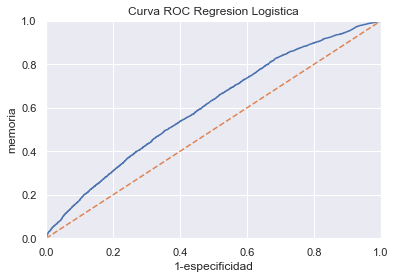

In [383]:
#Curva ROC: Es un grafico que muestra la especificidad vs la memoria. Para su construccion se utilizan las probabilidades predecidas por nuestro modelo.
#Especificidad: Casos negativos correctamente detectados/Casos negativos reales.
from sklearn.metrics import roc_curve, roc_auc_score

logr_pbb_predicciones=logr.predict_proba(X_test)

memlogr, unomenosespeclogr, umbrallogr = roc_curve(y_test,logr_pbb_predicciones[:,1])
plt.title('Curva ROC Regresion Logistica')
plt.plot(memlogr, unomenosespeclogr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('1-especificidad')
plt.ylabel('memoria')
plt.show()

In [384]:
print('Area por debajo de la curva ROC: ',roc_auc_score(y_test,logr_pbb_predicciones[:,1]))

Area por debajo de la curva ROC:  0.6038893490063043


### Arbol de Decision

In [385]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_predicciones=dtc.predict(X_test)

print(classification_report(y_test,dtc_predicciones))

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88     16660
         1.0       0.38      0.19      0.26      3802

    accuracy                           0.79     20462
   macro avg       0.61      0.56      0.57     20462
weighted avg       0.75      0.79      0.76     20462



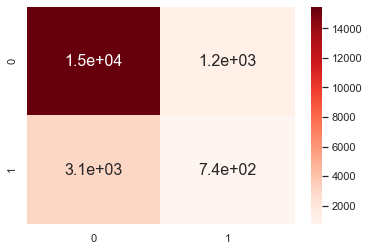

In [386]:
dtc_array=confusion_matrix(y_test,dtc_predicciones)
df_dtc_array=pd.DataFrame(dtc_array)
sns.set(font_scale=1)
plt.show(sns.heatmap(df_dtc_array,annot=True,annot_kws={'size':16},cmap='Reds'))

In [387]:
print('Exactitud dtc: ',accuracy_score(y_test,dtc_predicciones))
print('Memoria dtc: ', recall_score(y_test,dtc_predicciones))
print('Precision dtc: ', precision_score(y_test,dtc_predicciones))
print('Puntuacion F1 dtc: ', f1_score(y_test,dtc_predicciones))

Exactitud dtc:  0.7910272700615776
Memoria dtc:  0.194634402945818
Precision dtc:  0.37871033776867963
Puntuacion F1 dtc:  0.2571230020847811


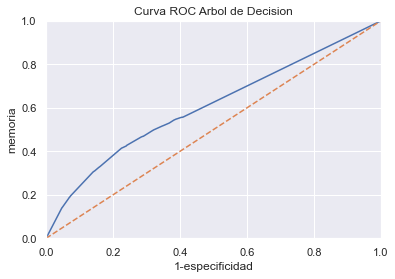

In [388]:
dtc_pbb_predicciones=dtc.predict_proba(X_test)

memdtc, unomenosespecdtc, umbraldtc = roc_curve(y_test,dtc_pbb_predicciones[:,1])
plt.title('Curva ROC Arbol de Decision')
plt.plot(memdtc, unomenosespecdtc)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('1-especificidad')
plt.ylabel('memoria')
plt.show()

In [389]:
print('Area por debajo de la curva ROC: ',roc_auc_score(y_test,dtc_pbb_predicciones[:,1]))

Area por debajo de la curva ROC:  0.6053009394183765


### Bosque Aleatorio

In [390]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_predicciones=rfc.predict(X_test)

print(classification_report(y_test,rfc_predicciones))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87     16660
         1.0       0.37      0.22      0.28      3802

    accuracy                           0.79     20462
   macro avg       0.60      0.57      0.58     20462
weighted avg       0.75      0.79      0.76     20462



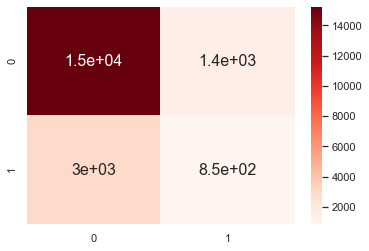

In [391]:
rfc_array=confusion_matrix(y_test,rfc_predicciones)
df_rfc_array=pd.DataFrame(rfc_array)
sns.set(font_scale=1)
plt.show(sns.heatmap(df_rfc_array,annot=True,annot_kws={'size':16},cmap='Reds'))

In [392]:
print('Exactitud rfc: ',accuracy_score(y_test,rfc_predicciones))
print('Memoria rfc: ', recall_score(y_test,rfc_predicciones))
print('Precision rfc: ', precision_score(y_test,rfc_predicciones))
print('Puntuacion F1 rfc: ', f1_score(y_test,rfc_predicciones))

Exactitud rfc:  0.7854559671586355
Memoria rfc:  0.22409258285113098
Precision rfc:  0.3717277486910995
Puntuacion F1 rfc:  0.2796192976698392


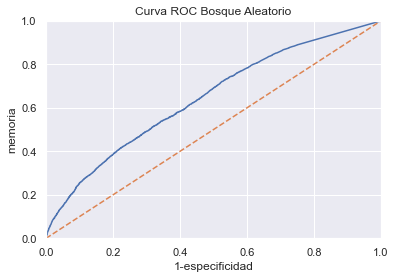

In [393]:
rfc_pbb_predicciones=rfc.predict_proba(X_test)

memrfc, unomenosespecrfc, umbralrfc = roc_curve(y_test,rfc_pbb_predicciones[:,1])
plt.title('Curva ROC Bosque Aleatorio')
plt.plot(memrfc, unomenosespecrfc)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('1-especificidad')
plt.ylabel('memoria')
plt.show()

In [394]:
print('Area por debajo de la curva ROC: ',roc_auc_score(y_test,rfc_pbb_predicciones[:,1]))

Area por debajo de la curva ROC:  0.6444579304630849


### Red Neuronal

In [395]:
from sklearn.neural_network import MLPClassifier
mlpc=MLPClassifier()
mlpc.fit(X_train,y_train)
mlpc_predicciones=mlpc.predict(X_test)

print(classification_report(y_test,mlpc_predicciones))

              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90     16660
         1.0       0.55      0.07      0.13      3802

    accuracy                           0.82     20462
   macro avg       0.69      0.53      0.51     20462
weighted avg       0.77      0.82      0.75     20462



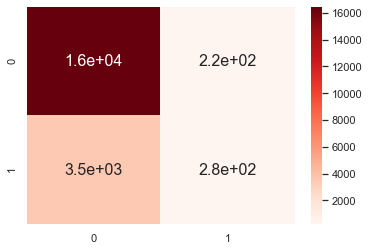

In [396]:
mlpc_array=confusion_matrix(y_test,mlpc_predicciones)
df_mlpc_array=pd.DataFrame(mlpc_array)
sns.set(font_scale=1)
plt.show(sns.heatmap(df_mlpc_array,annot=True,annot_kws={'size':16},cmap='Reds'))

In [397]:
print('Exactitud mlpc: ',accuracy_score(y_test,mlpc_predicciones))
print('Memoria mlpc: ', recall_score(y_test,mlpc_predicciones))
print('Precision mlpc: ', precision_score(y_test,mlpc_predicciones))
print('Puntuacion F1 mlpc: ', f1_score(y_test,mlpc_predicciones))

Exactitud mlpc:  0.8167823282181605
Memoria mlpc:  0.07311941083640189
Precision mlpc:  0.5526838966202783
Puntuacion F1 mlpc:  0.12915214866434377


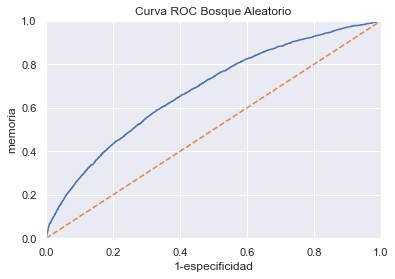

In [398]:
mlpc_pbb_predicciones=mlpc.predict_proba(X_test)

memmlpc, unomenosespecmlpc, umbralmlpc = roc_curve(y_test,mlpc_pbb_predicciones[:,1])
plt.title('Curva ROC Bosque Aleatorio')
plt.plot(memmlpc, unomenosespecmlpc)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('1-especificidad')
plt.ylabel('memoria')
plt.show()

In [399]:
print('Area por debajo de la curva ROC: ',roc_auc_score(y_test,mlpc_pbb_predicciones[:,1]))

Area por debajo de la curva ROC:  0.6802915142911452


# 5.
# Evalúa tu modelo. ¿Qué performance tiene?¿Qué métricas usaste para evaluar esa performance y por qué?¿Por qué elegiste ese algoritmo en particular?¿Qué variables son las que más influyen en la predicción?¿Cómo podrías mejorar la performance?

### Respuestas

El modelo finalmente elegido es una red neuronal de clasificacion.

##### ¿Qué performance tiene?
* De acuerdo a las metricas podria decirse que el modelo tiene una exactitud 86% y con un 65.4% de area bajo la curva.

##### ¿Qué métricas usaste para evaluar esa performance y por qué?
* Utilice 6 indicadores: las medidas de exactitud, memoria, precision, F1, matriz de confuson y area bajo la curva ROC. Esto debido a que son las metricas principales y mas faciles de entender en los modelos de clasificacion. Utilizan principalmente el numero de casos reales y predecidos por el modelos, ya sean acertados como no acertados.

##### ¿Por qué elegiste ese algoritmo en particular?
* Elegi este modelo principalmente por los resutados que arrojaron la medida de exactitud y area bajo la curva ROC.

##### ¿Qué variables son las que más influyen en la predicción?
* Como se vio anteriormente las variables que man influyen en el atraso de un vuelo son la aerolina que opera el vuelo, el destino del vuelo, el mes del vuelo y tipo de vuelo.

##### ¿Cómo podrías mejorar la performance?
* Esta se podria mejorar si se eligen mejor los parametros del modelo. Por ejemplo, GridSearch CV proporciona la posibilidad de evaluar el modelo bajo una red de diferentes valores que podrian tomar los parametros, y finalmente almacenar aquella combinacion con permite el mejor rendimiento del modelo. Sin embargo, una buena busqueda en red requiere capacidades computacionales competentes (en ocasiones, la busqueda puede tardar una buena cantidad de tiempo).
